In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_loan.csv')

In [4]:
train.shape

(614, 13)

In [5]:
test = pd.read_csv('test_loan.csv')

In [6]:
test.shape

(367, 12)

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


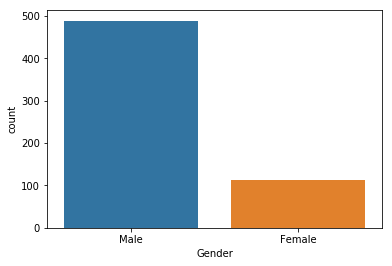

In [13]:
sns.countplot(train['Gender'])

In [15]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [34]:
train.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [50]:
def count_n_plot(df, val):
    sns.countplot(df[val])
    print(df[val].value_counts(dropna=False))
    

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


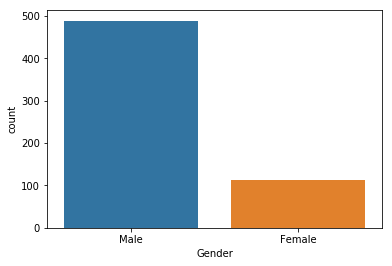

In [36]:
count_n_plot(train, 'Gender')

In [43]:
categorical = [x for x in train.dtypes.index if train.dtypes[x] == 'object']

In [52]:
numerical = [x for x in train.dtypes.index if train.dtypes[x]== 'int64']

In [53]:
numerical

['ApplicantIncome']

In [44]:
categorical = categorical[1:]

In [45]:
categorical = categorical+['Credit_History', 'Loan_Amount_Term']

In [46]:
categorical

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History',
 'Loan_Amount_Term']

[[[[[[ Gender ]]]]]]
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


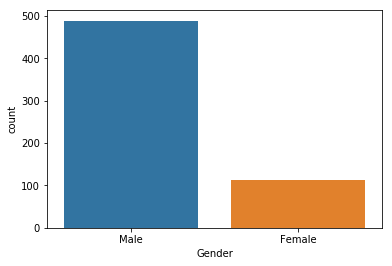

[[[[[[ Married ]]]]]]
Yes    398
No     213
NaN      3
Name: Married, dtype: int64


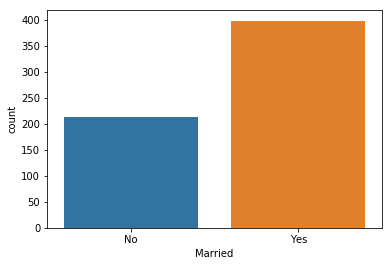

[[[[[[ Dependents ]]]]]]
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


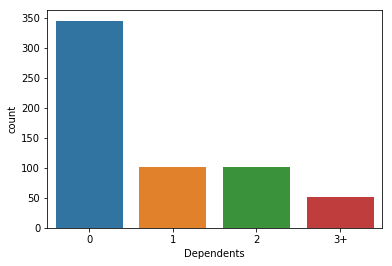

[[[[[[ Education ]]]]]]
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


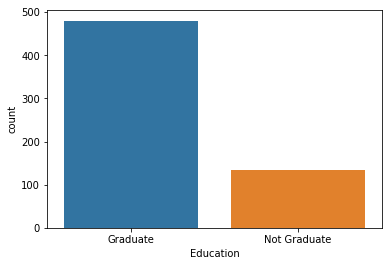

[[[[[[ Self_Employed ]]]]]]
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64


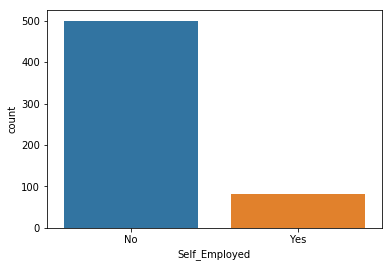

[[[[[[ Property_Area ]]]]]]
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


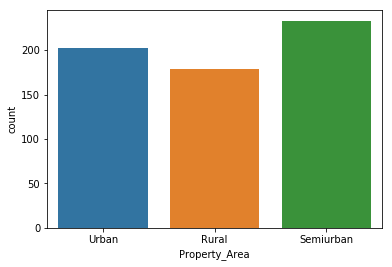

[[[[[[ Loan_Status ]]]]]]
Y    422
N    192
Name: Loan_Status, dtype: int64


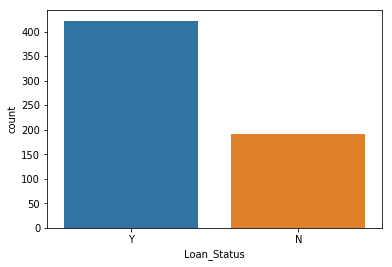

[[[[[[ Credit_History ]]]]]]
1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64


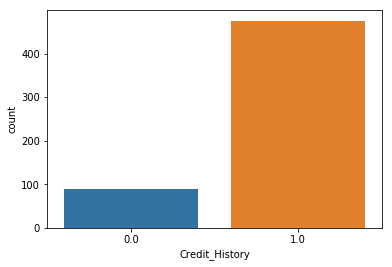

[[[[[[ Loan_Amount_Term ]]]]]]
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


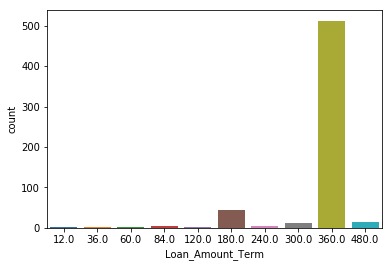

In [51]:
for obj in categorical:
    print('[[[[[[',obj,']]]]]]')
    count_n_plot(train, obj)
    plt.show()

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


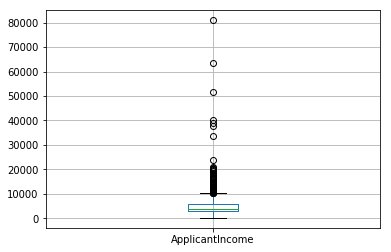

In [55]:
train.boxplot(column='ApplicantIncome')

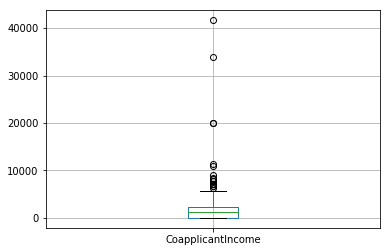

In [56]:
train.boxplot(column='CoapplicantIncome')

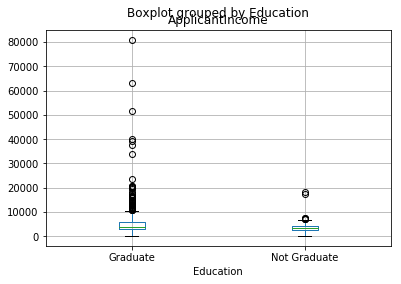

In [57]:
train.boxplot(column='ApplicantIncome', by='Education')

In [58]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


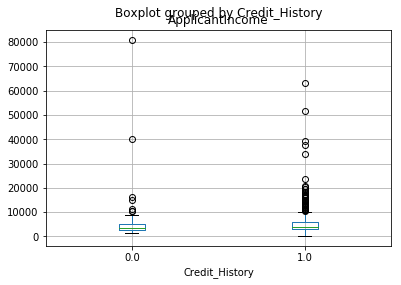

In [59]:
train.boxplot(column='ApplicantIncome', by='Credit_History')

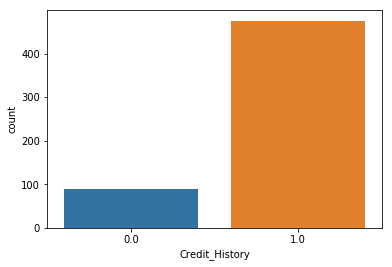

In [60]:
sns.countplot(train['Credit_History'])

In [67]:
CH_LS_crosstab = pd.crosstab(train['Credit_History'], train['Loan_Status'], normalize=True)

In [68]:
CH_LS_crosstab

Loan_Status,N,Y
Credit_History,,
0.0,0.145390,0.012411
1.0,0.171986,0.670213


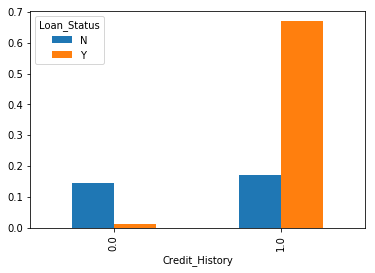

In [69]:
CH_LS_crosstab.plot(kind='bar')

In [70]:
train.pivot_table('ApplicantIncome','Loan_Status' )

,ApplicantIncome
Loan_Status,
N,5446.078125
Y,5384.068720


In [81]:
gender_pt = pd.pivot_table(data=train,index=['Credit_History'], columns='Gender' , values='ApplicantIncome', aggfunc='mean')

In [82]:
gender_pt

Gender,Female,Male
Credit_History,,
0.0,3804.411765,6253.188406
1.0,5013.488095,5323.400524
